In [1]:
import pandas as pd
import numpy as np

# Acquire Datasets:

In [2]:
x_unigram_features = pd.read_csv('/kaggle/input/lyrics-processing-reduced/x_feature_reduced.csv')
y_labels = pd.read_csv('/kaggle/input/lyrics-processing-reduced/y_label_categorized_reduced_one_label.csv')

# Preprocessing:

In [3]:
print(x_unigram_features.shape)
x_unigram_features.drop(columns=['Unnamed: 0'], inplace=True)
print(x_unigram_features.shape)

(14084, 5522)
(14084, 5521)


In [4]:
# Create a list to store the consolidated labels
y_labels.drop(columns=['Unnamed: 0'], inplace=True)
consolidated_labels = []

# Loop through each row in the DataFrame
for index, row in y_labels.iterrows():
    # Find the column with the non-zero value (1)
    label = row.idxmax()
    # Append the label to the list
    consolidated_labels.append(label)

# Create a new column 'label' in the DataFrame with the consolidated labels
y_labels['label'] = consolidated_labels

# Split Data:

In [5]:
#Unigram training
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_unigram_features, y_labels['label'], test_size=0.2, random_state=42)
print(len(x_train), len(x_test), len(y_train), len(y_test))


11267 2817 11267 2817


In [6]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(11267, 5521)
(11267,)
(2817, 5521)
(2817,)


# Catboost Training:

In [ ]:
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
#cat = XGBClassifier()
cat = CatBoostClassifier(n_estimators=200, silent=False, learning_rate = 0.01, depth = 10)
cat.fit(x_train, y_train)

# Save Model:

In [16]:
import pickle
pickle.dump(cat, open("cat_classifier.pkl", "wb"))

In [8]:
cat.save_model('cat', format="cbm")
print("Saved!")

Saved!


In [8]:
# Load Classifier
#import pickle
#with open('/kaggle/input/cat-lyrics-model/Cat Classifier.pkl', 'rb') as file:
#    cat = pickle.load(file)
#    file.close

# Catboost Testing:

In [9]:
from sklearn.metrics import f1_score
prediction = cat.predict(x_test)
print(f1_score(y_test, prediction, average="micro"))

0.232871849485268

In [10]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, cat.predict_proba(x_test), multi_class='ovr'))

0.7192298141292958


In [11]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, prediction))

0.232871849485268


# Confusion Matrix:

In [13]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, prediction)

<AxesSubplot:>

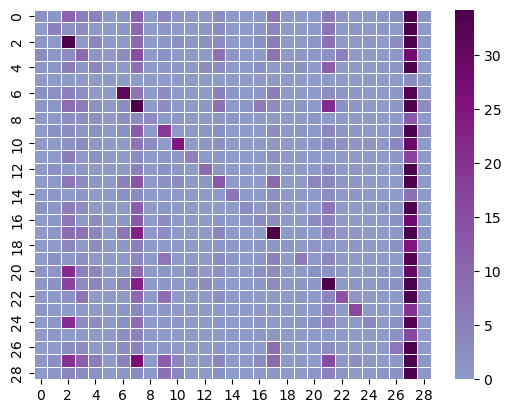

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

cmap = sns.diverging_palette(280, 350, sep=1, as_cmap=True)
#plt.figure(figsize = (20,20))
sns.heatmap(matrix, robust = True, linewidth=.5, cmap="BuPu", center=1)
#plt.savefig('my_plot.png')

In [ ]:
#correlation_mat = x_unigram_features.corr()
#sns.heatmap(correlation_mat, annot = True)
#plt.show()

In [13]:
print(prediction)

[['pessimistic']
 ['emotional']
 ['uplifting']
 ...
 ['spiritual']
 ['calm']
 ['uplifting']]


# Previous Attempts:

In [3]:
#from catboost import CatBoostClassifier
#from sklearn.multioutput import MultiOutputClassifier

#clf = MultiOutputClassifier(CatBoostClassifier(n_estimators=200, silent=False))
#clf.fit(x_train, y_train)

In [27]:
#from sklearn.metrics import confusion_matrix
#from sklearn.metrics import roc_auc_score
#from sklearn.metrics import classification_report
#from sklearn.datasets import make_multilabel_classification
#from xgboost import XGBClassifier
#from sklearn.model_selection import KFold
#from sklearn.multioutput import MultiOutputClassifier
#from sklearn.pipeline import Pipeline

In [4]:
#classifier = MultiOutputClassifier(XGBClassifier())

#clf = Pipeline([('classify', classifier)])

#print (clf)

In [2]:
#clf.fit(x_train, y_train)
#print(clf.score(x_train, y_train))

In [6]:
#from sklearn.multiclass import OneVsRestClassifier
#from xgboost import XGBClassifier
#from sklearn.preprocessing import MultiLabelBinarizer

#xgb = OneVsRestClassifier(XGBClassifier(n_jobs=-1, max_depth=4))

# You may need to use MultiLabelBinarizer to encode your variables from arrays [[x, y, z]] to a multilabel 
# format before training.
#mlb = MultiLabelBinarizer()
#y = mlb.fit_transform(y_train)

#print("x_train:" + str(x_train.shape))
#print("y_train:" + str(y_train.shape))
#print("y:" + str(y.shape))

#xgb.fit(x_train, y_train)

# Image Generation Attempt:

In [1]:
!pip install diffusers==0.2.4
!pip install transformers scipy ftfy
!pip install "ipywidgets>=7,<8"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.0/113.0 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 2.0 MB/s eta 0:00:00


In [2]:
# login to huggin face (get an access token etc...)
from huggingface_hub import notebook_login
notebook_login()

In [3]:
import torch
from diffusers import StableDiffusionPipeline
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", revision="fp16", torch_dtype=torch.float16, use_auth_token=True)

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


TypeError: getattr(): attribute name must be string

In [6]:
pipe = pipe.to("cuda")

NameError: name 'pipe' is not defined

In [ ]:
from torch import autocast
prompt = "photo of a panda surfing"
with autocast("cuda"):
  image = pipe(prompt)["sample"][0]  
image.save(f"panda_surfer.png")
image